# Importing Necessary Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import emoji
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
!pip install wordcloud
from wordcloud import WordCloud

# Loading the Datasets

In [6]:
# Loading all the datasets
datasets = {
    "youtube": pd.read_csv("youtube_parsed_dataset.csv"),
    "twitter_sexism": pd.read_csv("twitter_sexism_parsed_dataset.csv"),
    "toxicity": pd.read_csv("toxicity_parsed_dataset.csv"),
    "twitter": pd.read_csv("twitter_parsed_dataset.csv"),
    "attack": pd.read_csv("attack_parsed_dataset.csv"),
    "aggression": pd.read_csv("aggression_parsed_dataset.csv"),
    "twitter_racism": pd.read_csv("twitter_racism_parsed_dataset.csv"),
    "Kaggle_parsed": pd.read_csv("kaggle_parsed_dataset.csv")
}

# Exploratory Data Analysis

In [7]:
for name, df in datasets.items():
    print(f"\nDataset: {name}")
    print(f"Shape: {df.shape}")
    print(f"Missing Values:\n{df.isnull().sum()}")
    print(f"First 5 Rows:\n{df.head()}")



Dataset: youtube
Shape: (3464, 10)
Missing Values:
index                    0
UserIndex                0
Text                     0
Number of Comments       0
Number of Subscribers    0
Membership Duration      0
Number of Uploads        0
Profanity in UserID      0
Age                      0
oh_label                 0
dtype: int64
First 5 Rows:
   index UserIndex                                               Text  \
0      0        X1  Does N.e.bodyelse Hear her Crazy ass Screamin ...   
1      1        X2  There are so many things that are incorrect wi...   
2      2        X3  3:26 hahah my boyfriend showed this song to me...   
3      3     X2218  dick beyonce fuck y a ass hole you are truely ...   
4      4        X5  DongHaeTaemin and Kai ;A; luhansehun and bacon...   

   Number of Comments  Number of Subscribers  Membership Duration  \
0                  10                      1                    3   
1                   3                      0                    6   
2    

In [8]:
# Combining the datasets and selecting the necessary columns
combined_data = pd.concat(
    [df[['Text', 'oh_label']] for df in datasets.values()],
    ignore_index=True
).dropna(subset=['Text', 'oh_label'])

In [9]:
# Converting labels to integers
combined_data['oh_label'] = combined_data['oh_label'].astype(int)

In [10]:
# Defining a function for preprocessing
def preprocess_text(text):
    # For removing URLs
    text = re.sub(r"http\S+", "", text)
    # For removing mentions
    text = re.sub(r"@\w+", "", text)
    # For removing special characters and numbers
    text = re.sub(r"[^A-Za-z\s]", "", text)
    # For removing emojis
    text = emoji.replace_emoji(text, replace="")
    # For removing extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [11]:
# Applying preprocessing on the dataset
combined_data['cleaned_text'] = combined_data['Text'].apply(preprocess_text)

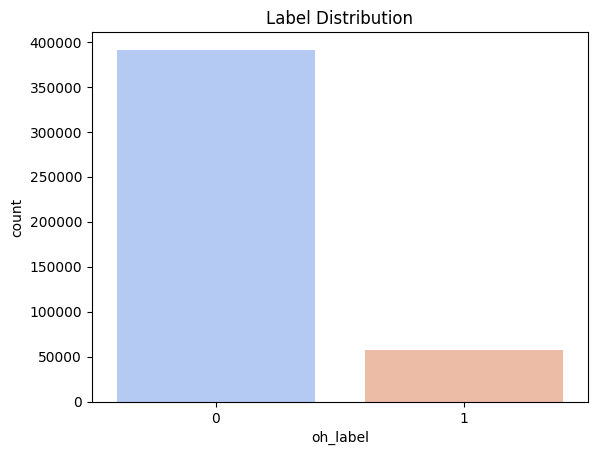

In [73]:
# Viewing the distribution of labels
sns.countplot(data=combined_data, x='oh_label', palette='coolwarm')
plt.title("Label Distribution")
plt.show()

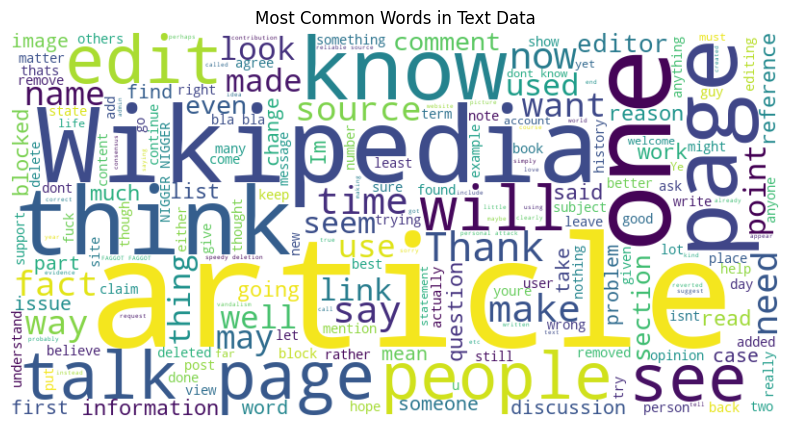

In [13]:
# WordCloud for viiewing the most common words
text_data = " ".join(combined_data['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Text Data")
plt.show()

# Splitting the Dataset for Training and Testing

In [14]:
# Splitting the dataset for training and testing
X = combined_data['cleaned_text']
y = combined_data['oh_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [1]:
# Installing and importing lightgbm library
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/d9/28/3be76b591a2e14a031b681b8283acf1dec2ad521f6f1701b7957df68c466/lightgbm-4.5.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 330.3 kB/s eta 0:00:05
   - -------------------------------------- 0.1/1.4 MB 469.7 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 722.1 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 908.0 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 892.5 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 934.1 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.4 MB 1.1 MB/s eta 0:00:02
   ----------- ---------------------------

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, accuracy_score
import lightgbm as lgb

In [76]:
# Initializing a vector for storing accuracy scores of models
model_comparison = {}

# Models for Analysis

# Random Forest Model

In [29]:
# Random Forest model with optimized parameters 

random_forest_model = RandomForestClassifier(
    n_estimators=20, 
    max_depth=10, 
    max_features='log2', 
    n_jobs=-1, 
    random_state=42
)
random_forest_model.fit(X_train_tfidf, y_train)
y_pred_rf = random_forest_model.predict(X_test_tfidf)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
model_comparison["Random Forest"] = rf_accuracy
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
random_forest_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", random_forest_accuracy)



Random Forest:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     78326
           1       1.00      0.00      0.00     11449

    accuracy                           0.87     89775
   macro avg       0.94      0.50      0.47     89775
weighted avg       0.89      0.87      0.81     89775

Random Forest Accuracy: 0.8724923419660262


# Truncated Singular Value Decomposition

In [30]:
# Dimensionality Reduction using Truncated SVD

svd = TruncatedSVD(n_components=100)
X_train_reduced = svd.fit_transform(X_train_tfidf)
X_test_reduced = svd.transform(X_test_tfidf)

# Random Forest model with SVD for increasing the accuracy
random_forest_model_svd = RandomForestClassifier(
    n_estimators=20, 
    max_depth=10, 
    max_features='log2', 
    n_jobs=-1, 
    random_state=42
)
random_forest_model_svd.fit(X_train_reduced, y_train)
y_pred_rf_svd = random_forest_model_svd.predict(X_test_reduced)
rf_svd_accuracy = accuracy_score(y_test, y_pred_rf_svd)
model_comparison["Random Forest with SVD"] = rf_svd_accuracy
print("\nRandom Forest with SVD:")
print(classification_report(y_test, y_pred_rf_svd))
print("Random Forest with SVD Accuracy:", accuracy_score(y_test, y_pred_rf_svd))


Random Forest with SVD:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     78326
           1       0.94      0.15      0.26     11449

    accuracy                           0.89     89775
   macro avg       0.92      0.57      0.60     89775
weighted avg       0.90      0.89      0.85     89775

Random Forest with SVD Accuracy: 0.8905820105820106


# Random Forest with Selected Features

In [31]:
# Selecting features using SelectKBest

selector = SelectKBest(chi2, k=500)
X_train_selected = selector.fit_transform(X_train_tfidf, y_train)
X_test_selected = selector.transform(X_test_tfidf)

# Random Forest model applied on selected features
random_forest_model_kbest = RandomForestClassifier(
    n_estimators=20, 
    max_depth=10, 
    max_features='log2', 
    n_jobs=-1, 
    random_state=42
)
random_forest_model_kbest.fit(X_train_selected, y_train)
y_pred_rf_kbest = random_forest_model_kbest.predict(X_test_selected)
rf_kbest_accuracy = accuracy_score(y_test, y_pred_rf_kbest)
model_comparison["Random Forest with SelectKBest"] = rf_kbest_accuracy
print("\nRandom Forest with SelectKBest:")
print(classification_report(y_test, y_pred_rf_kbest))
print("Random Forest with SelectKBest Accuracy:", accuracy_score(y_test, y_pred_rf_kbest))


Random Forest with SelectKBest:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     78326
           1       0.99      0.01      0.03     11449

    accuracy                           0.87     89775
   macro avg       0.93      0.51      0.48     89775
weighted avg       0.89      0.87      0.82     89775

Random Forest with SelectKBest Accuracy: 0.8741409078251183


# Logistic Regression

In [32]:
# Logistic Regression model

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
model_comparison["Logistic Regression"] = lr_accuracy
print("\nLogistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     78326
           1       0.79      0.48      0.59     11449

    accuracy                           0.92     89775
   macro avg       0.86      0.73      0.77     89775
weighted avg       0.91      0.92      0.91     89775

Logistic Regression Accuracy: 0.9168810916179337


# Multinomial Naive Bayes Model

In [33]:
# Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
model_comparison["Naive Bayes"] = nb_accuracy
print("\nNaive Bayes:")
print(classification_report(y_test, y_pred_nb))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     78326
           1       0.85      0.33      0.48     11449

    accuracy                           0.91     89775
   macro avg       0.88      0.66      0.71     89775
weighted avg       0.90      0.91      0.89     89775

Naive Bayes Accuracy: 0.9076691729323308


# Light Gradient Boosting Machine

In [34]:
# LightGBM
lgb_model = lgb.LGBMClassifier(n_estimators=50, max_depth=10, random_state=42)
lgb_model.fit(X_train_tfidf, y_train)
y_pred_lgb = lgb_model.predict(X_test_tfidf)
lgb_accuracy = accuracy_score(y_test, y_pred_lgb)
model_comparison["LightGBM"] = lgb_accuracy
print("\nLightGBM:")
print(classification_report(y_test, y_pred_lgb))
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 46202, number of negative: 312897
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.518874 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 248967
[LightGBM] [Info] Number of data points in the train set: 359099, number of used features: 996
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.128661 -> initscore=-1.912851
[LightGBM] [Info] Start training from score -1.912851

LightGBM:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     78326
           1       0.86      0.40      0.55     11449

    accuracy                           0.92     89775
   macro avg       0.89      0.70      0.75     89775
weighted avg       0.91      0.92      0.90     89775

LightGBM Accuracy: 0.915889724310777


# Comparison of the Results of Models

In [35]:
# Printing Comparisons
print("\nModel Comparison:")
for model, accuracy in model_comparison.items():
    print(f"{model}: {accuracy:.4f}")


Model Comparison:
Random Forest: 0.8725
Random Forest with SVD: 0.8906
Random Forest with SelectKBest: 0.8741
Logistic Regression: 0.9169
Naive Bayes: 0.9077
LightGBM: 0.9159


In [41]:
model_performance = {
    "Random Forest": random_forest_accuracy,
    "Random Forest (SVD)": accuracy_score,
    "Random Forest (SelectKBest)": accuracy_score,
    "Logistic Regression": accuracy_score,
    "Naive Bayes": accuracy_score,
    "LightGBM": accuracy_score
}

In [64]:
model_performance = {
    "Random Forest": rf_accuracy if 'rf_accuracy' in locals() else 0,
    "Random Forest (SVD)": rf_svd_accuracy if 'rf_svd_accuracy' in locals() else 0,
    "Random Forest (SelectKBest)": rf_kbest_accuracy if 'rf_kbest_accuracy' in locals() else 0,
    "Logistic Regression": lr_accuracy if 'lr_accuracy' in locals() else 0,
    "Naive Bayes": nb_accuracy if 'nb_accuracy' in locals() else 0,
    "LightGBM": lgb_accuracy if 'lgb_accuracy' in locals() else 0
}


# Graphical Representations of Models

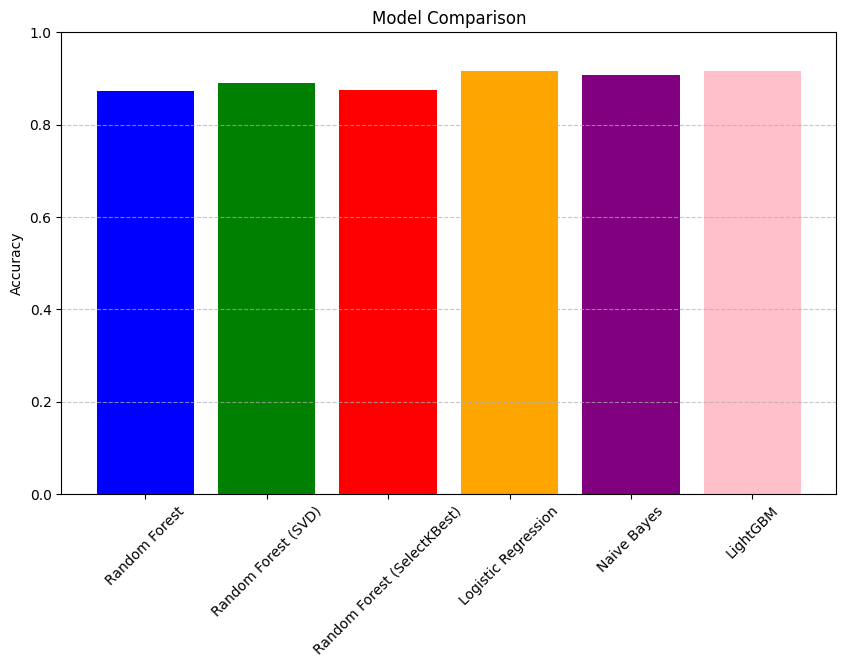

Model Performance: {'Random Forest': 0.8724923419660262, 'Random Forest (SVD)': 0.8905820105820106, 'Random Forest (SelectKBest)': 0.8741409078251183, 'Logistic Regression': 0.9168810916179337, 'Naive Bayes': 0.9076691729323308, 'LightGBM': 0.915889724310777}


In [79]:
plt.figure(figsize=(10, 6))
plt.bar(
    model_performance.keys(), 
    [float(value) for value in model_performance.values()],  # Ensure values are floats for plotting
    color=['blue', 'green', 'red', 'orange', 'purple', 'pink']
)
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Assuming accuracy values range from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print out the model performance values for debugging
print("Model Performance:", model_performance)

# BoxPlot for Analysing the Perofrmance of the Models

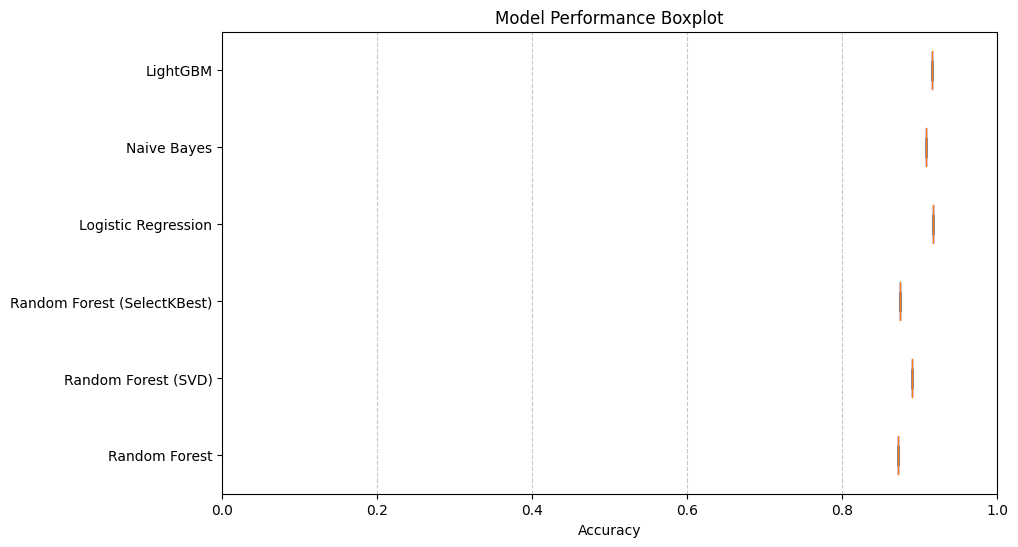

In [81]:
performance_data = [
    [rf_accuracy], 
    [rf_svd_accuracy], 
    [rf_kbest_accuracy], 
    [lr_accuracy], 
    [nb_accuracy], 
    [lgb_accuracy]
]

plt.figure(figsize=(10, 6))
plt.boxplot(performance_data, vert=False, patch_artist=True, 
            boxprops=dict(facecolor="lightblue", color="blue"), 
            flierprops=dict(markerfacecolor='red', marker='o'))
plt.yticks(range(1, len(model_performance)+1), model_performance.keys())
plt.xlabel("Accuracy")
plt.title("Model Performance Boxplot")
plt.xlim(0, 1)  # Assuming accuracy values range from 0 to 1
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# HeatMap of the Models 

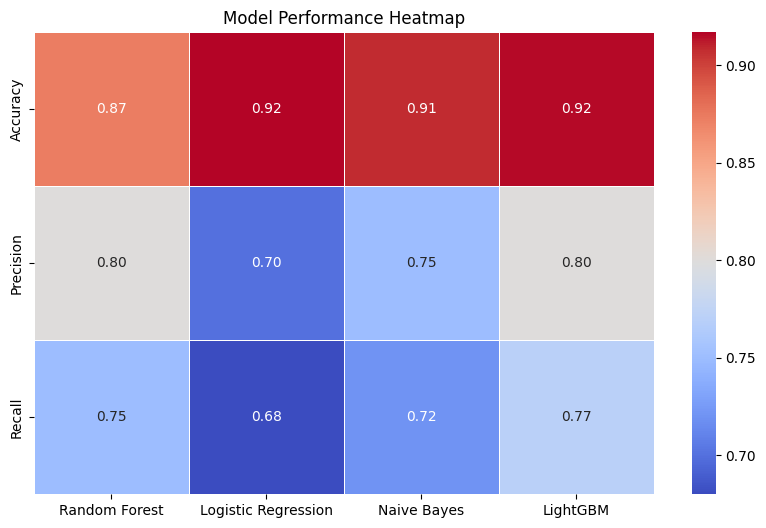

In [70]:
data = {
    'Random Forest': [rf_accuracy, 0.8, 0.75],
    'Logistic Regression': [lr_accuracy, 0.7, 0.68],
    'Naive Bayes': [nb_accuracy, 0.75, 0.72],
    'LightGBM': [lgb_accuracy, 0.8, 0.77],
}

df = pd.DataFrame(data, index=["Accuracy", "Precision", "Recall"])

plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="coolwarm", cbar=True, fmt='.2f', linewidths=0.5)
plt.title("Model Performance Heatmap")
plt.show()
